In [24]:
# to download osm data
import osmnx as ox

# to import and explore data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

In [96]:
address = 'India,Maharashtra,Mumbai,Matunga'

In [97]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

CPU times: total: 266 ms
Wall time: 5.45 s


In [99]:
# how many rows and columns?
osm.shape

(1944, 53)

In [100]:
# what is the datatype?
type(osm)

geopandas.geodataframe.GeoDataFrame

In [102]:
# what are the columns and their datatypes?
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1944 entries, ('node', 5057814507) to ('relation', 9302735)
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   building                  1944 non-null   object  
 1   name                      400 non-null    object  
 2   geometry                  1944 non-null   geometry
 3   nodes                     1943 non-null   object  
 4   addr:city                 495 non-null    object  
 5   addr:housenumber          271 non-null    object  
 6   addr:postcode             187 non-null    object  
 7   addr:street               191 non-null    object  
 8   club                      1 non-null      object  
 9   designation               1 non-null      object  
 10  sport                     1 non-null      object  
 11  amenity                   40 non-null     object  
 12  religion                  11 non-null     object  
 13  hist

In [103]:
# show me the first 5 rows
osm.head()

building                         name  \
element_type osmid                                              
node         5057814507      yes           Mysore Association   
way          49684327        yes  Dadar Parsi Colony Gymkhana   
             112781800    church             Don Bosco Church   
             112785300    school                          NaN   
             113566048       yes                Empress Mahal   

                                                                  geometry  \
element_type osmid                                                           
node         5057814507                          POINT (72.85489 19.02836)   
way          49684327    POLYGON ((72.85078 19.02139, 72.85015 19.02058...   
             112781800   POLYGON ((72.85720 19.02583, 72.85722 19.02568...   
             112785300   POLYGON ((72.85583 19.03256, 72.85598 19.03274...   
             113566048   POLYGON ((72.84724 19.01831, 72.84740 19.01821...   

                                                                     nodes  \
element_type osmid                                                           
node         5057814507                                                NaN   
way          49684327    [631525353, 631525355, 631525357, 631525359, 6...   
             112781800   [1281204623, 1281204610, 1281204591, 128120462...   
             112785300   [1281234581, 1281234576, 1281234582, 128123458...   
             113566048   [1287692267, 1287692149, 1287692263, 128769220...   

                        addr:city addr:housenumber addr:postcode  \
element_type osmid                                                 
node         5057814507       NaN              NaN           NaN   
way          49684327      Mumbai          605-606        400014   
             112781800        NaN              NaN           NaN   
             112785300        NaN              NaN           NaN   
             113566048     Mumbai              170        400014   

                                                       addr:street   club  \
element_type osmid                                                          
node         5057814507                                        NaN    NaN   
way          49684327    Dr Babasaheb Ambedkar Marg (Vincent Road)  sport   
             112781800                                         NaN    NaN   
             112785300                                         NaN    NaN   
             113566048                             Khodadad Circle    NaN   

                                   designation  ... payment:visa  \
element_type osmid                              ...                
node         5057814507                    NaN  ...          NaN   
way          49684327    Dadar Parsee Gymkhana  ...          NaN   
             112781800                     NaN  ...          NaN   
             112785300                     NaN  ...          NaN   
             113566048                     NaN  ...          NaN   

                        payment:visa_debit phone tourism description height  \
element_type osmid                                                            
node         5057814507                NaN   NaN     NaN         NaN    NaN   
way          49684327                  NaN   NaN     NaN         NaN    NaN   
             112781800                 NaN   NaN     NaN         NaN    NaN   
             112785300                 NaN   NaN     NaN         NaN    NaN   
             113566048                 NaN   NaN     NaN         NaN    NaN   

                        railway addr:suburb ways type  
element_type osmid                                     
node         5057814507     NaN         NaN  NaN  NaN  
way          49684327       NaN         NaN  NaN  NaN  
             112781800      NaN         NaN  NaN  NaN  
             112785300      NaN         NaN  NaN  NaN  
             113566048      NaN         NaN  NaN  NaN  

[5 rows x 53 columns]

In [104]:
# show me 10 random rows
osm.sample(10)

building            name  \
element_type osmid                                    
way          136170605          yes             NaN   
             357360439   apartments             NaN   
             118577313          yes             NaN   
             684153118  residential             NaN   
             357187294          yes             NaN   
             357360413   apartments             NaN   
             357360549          yes             NaN   
             117083046          yes  Ruparel Bhavan   
             118577304          yes             NaN   
             895238416          yes             NaN   

                                                                 geometry  \
element_type osmid                                                          
way          136170605  POLYGON ((72.84816 19.02060, 72.84829 19.02051...   
             357360439  POLYGON ((72.84392 19.03333, 72.84401 19.03332...   
             118577313  POLYGON ((72.85232 19.02861, 72.85240 19.02852...   
             684153118  POLYGON ((72.85547 19.02299, 72.85557 19.02298...   
             357187294  POLYGON ((72.84872 19.03359, 72.84873 19.03375...   
             357360413  POLYGON ((72.84442 19.03263, 72.84458 19.03261...   
             357360549  POLYGON ((72.84691 19.03079, 72.84695 19.03093...   
             117083046  POLYGON ((72.85272 19.02638, 72.85282 19.02630...   
             118577304  POLYGON ((72.85196 19.02874, 72.85215 19.02867...   
             895238416  POLYGON ((72.84280 19.02066, 72.84302 19.02054...   

                                                                    nodes  \
element_type osmid                                                          
way          136170605  [1494131973, 1494131965, 1494132083, 149413214...   
             357360439  [3626443550, 3626443541, 3626443521, 362644352...   
             118577313  [1333413439, 1333413529, 1333413528, 133341346...   
             684153118  [6409211884, 6409212085, 6409212086, 640921208...   
             357187294  [3625173097, 3625173105, 3625173104, 362517309...   
             357360413  [3626443386, 3626443377, 3626443357, 362644336...   
             357360549  [3626442877, 3626442885, 3626442879, 362644287...   
             117083046  [1318925263, 1318925409, 1318925470, 131892554...   
             118577304  [1333413466, 1333413531, 1333413537, 133341352...   
             895238416  [8321490073, 8321490072, 8321490071, 832149007...   

                       addr:city addr:housenumber addr:postcode   addr:street  \
element_type osmid                                                              
way          136170605       NaN              NaN           NaN           NaN   
             357360439    Mumbai              NaN           NaN           NaN   
             118577313       NaN              NaN           NaN           NaN   
             684153118    Mumbai              514        400019  College Road   
             357187294       NaN              NaN           NaN           NaN   
             357360413    Mumbai              NaN           NaN           NaN   
             357360549    Mumbai              NaN           NaN           NaN   
             117083046       NaN              NaN           NaN           NaN   
             118577304       NaN              NaN           NaN           NaN   
             895238416       NaN              NaN           NaN           NaN   

                       club designation  ... payment:visa payment:visa_debit  \
element_type osmid                       ...                                   
way          136170605  NaN         NaN  ...          NaN                NaN   
             357360439  NaN         NaN  ...          NaN                NaN   
             118577313  NaN         NaN  ...          NaN                NaN   
             684153118  NaN         NaN  ...          NaN                NaN   
             357187294  NaN         NaN  ...          NaN      

In [105]:
# subset it

# create a list of column names you want to keep
columns_to_keep = ['geometry','building']

# redefine the dataframe based on only the columns we want to keep 
osm = osm[columns_to_keep]

# output 10 random rows
osm.sample(10)

geometry  \
element_type osmid                                                          
way          357187364  POLYGON ((72.85335 19.03499, 72.85344 19.03502...   
             136170583  POLYGON ((72.84764 19.02123, 72.84774 19.02117...   
             357360540  POLYGON ((72.84260 19.02828, 72.84307 19.02822...   
             357031570  POLYGON ((72.84106 19.02131, 72.84119 19.02127...   
             357187281  POLYGON ((72.84888 19.03187, 72.84898 19.03203...   
             683025470  POLYGON ((72.85655 19.02753, 72.85648 19.02759...   
             118176254  POLYGON ((72.85342 19.02959, 72.85363 19.02950...   
             117635029  POLYGON ((72.85477 19.03261, 72.85481 19.03270...   
             115831512  POLYGON ((72.85518 19.02276, 72.85532 19.02272...   
             434908144  POLYGON ((72.85134 19.03055, 72.85178 19.03028...   

                           building  
element_type osmid                   
way          357187364          yes  
             136170583          yes  
             357360540          yes  
             357031570          yes  
             357187281          yes  
             683025470          yes  
             118176254          yes  
             117635029          yes  
             115831512  residential  
             434908144          yes

In [106]:
# assign a new variable for building counts
osm_building_counts = osm.building.value_counts()

# output the results
osm_building_counts

yes              1434
apartments        259
residential       191
school             21
college            20
commercial          9
church              2
bungalow            2
train_station       2
public              1
retail              1
mosque              1
house               1
Name: building, dtype: int64

In [107]:
type(osm_building_counts)

pandas.core.series.Series

In [108]:
# create a new variable and convert it into a pandas dataframe
df_osm_building_types = pd.DataFrame(osm_building_counts)

# what does the dataframe look like?
df_osm_building_types

,building
yes,1434
apartments,259
residential,191
school,21
college,20
commercial,9
church,2
bungalow,2
train_station,2
public,1


In [109]:
# reset the index
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

,index,building
0,yes,1434
1,apartments,259
2,residential,191
3,school,21
4,college,20
5,commercial,9
6,church,2
7,bungalow,2
8,train_station,2
9,public,1


In [110]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

,building_type,count
0,yes,1434
1,apartments,259
2,residential,191
3,school,21
4,college,20
5,commercial,9
6,church,2
7,bungalow,2
8,train_station,2
9,public,1


<Axes: >

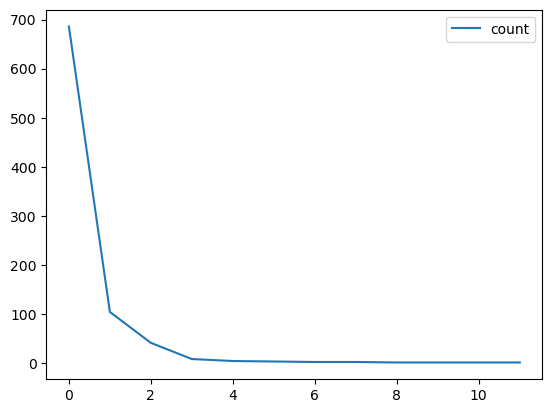

In [68]:
df_osm_building_types.plot()

<Axes: ylabel='building_type'>

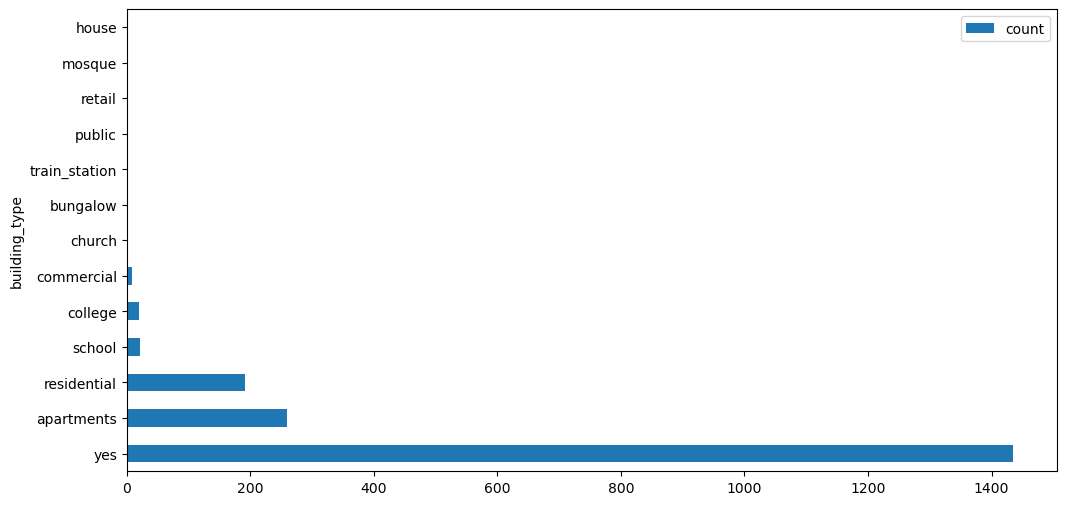

In [111]:
df_osm_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

In [112]:
# sort it the other way
df_osm_building_types = df_osm_building_types.sort_values(by='count', ascending=True)
df_osm_building_types

,building_type,count
9,public,1
10,retail,1
11,mosque,1
12,house,1
6,church,2
7,bungalow,2
8,train_station,2
5,commercial,9
4,college,20
3,school,21


<Axes: title={'center': 'Top 10 building types in India,Maharashtra,Mumbai,Matunga'}, ylabel='building_type'>

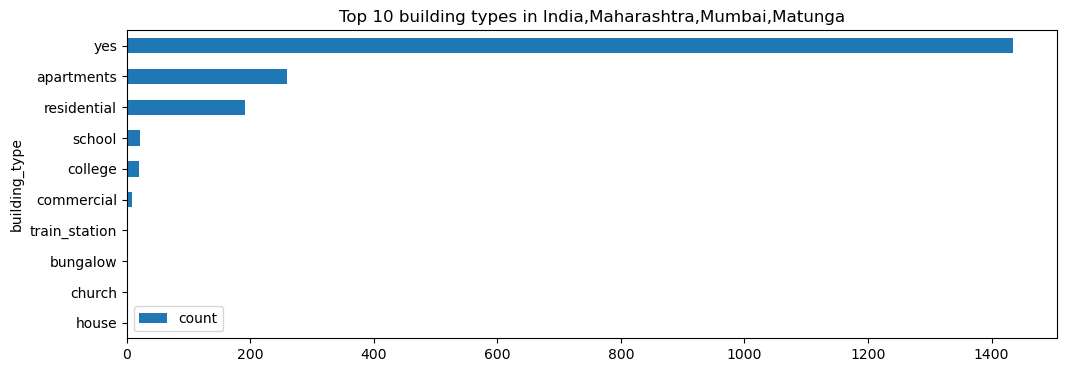

In [113]:
df_osm_building_types[-10:].plot.barh(figsize=(12,4),
                                      x='building_type',
                                      y='count',
                                      title="Top 10 building types in "+address)

In [114]:
# check the data type
type(osm)

geopandas.geodataframe.GeoDataFrame

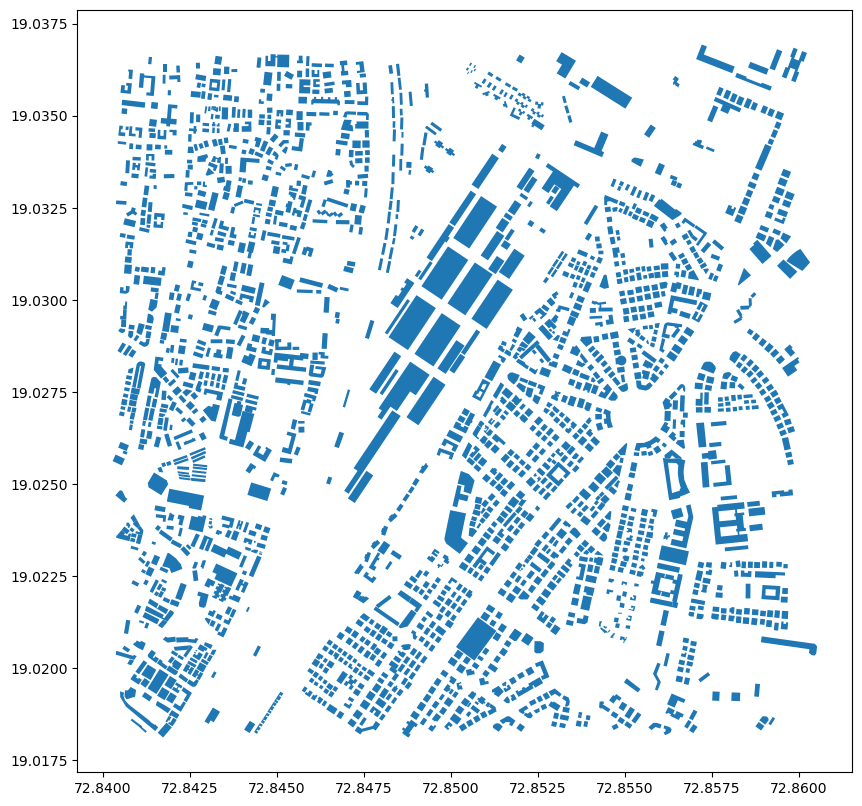

In [115]:
# plot entire dataset
ax = osm.plot(figsize=(10,10))

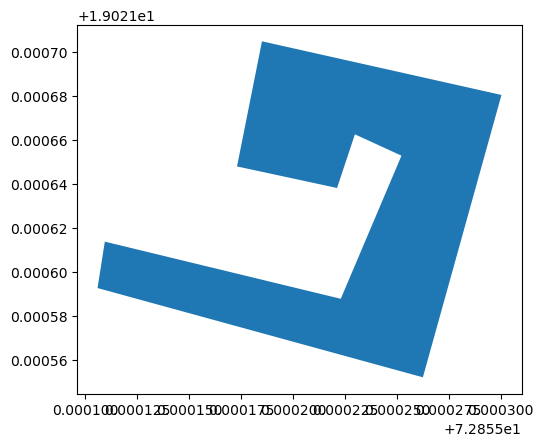

In [224]:
# plot a single random building
ax = osm.sample(1).plot()

(72.839276015, 72.86153088500001, 19.017178004999998, 19.037875495)

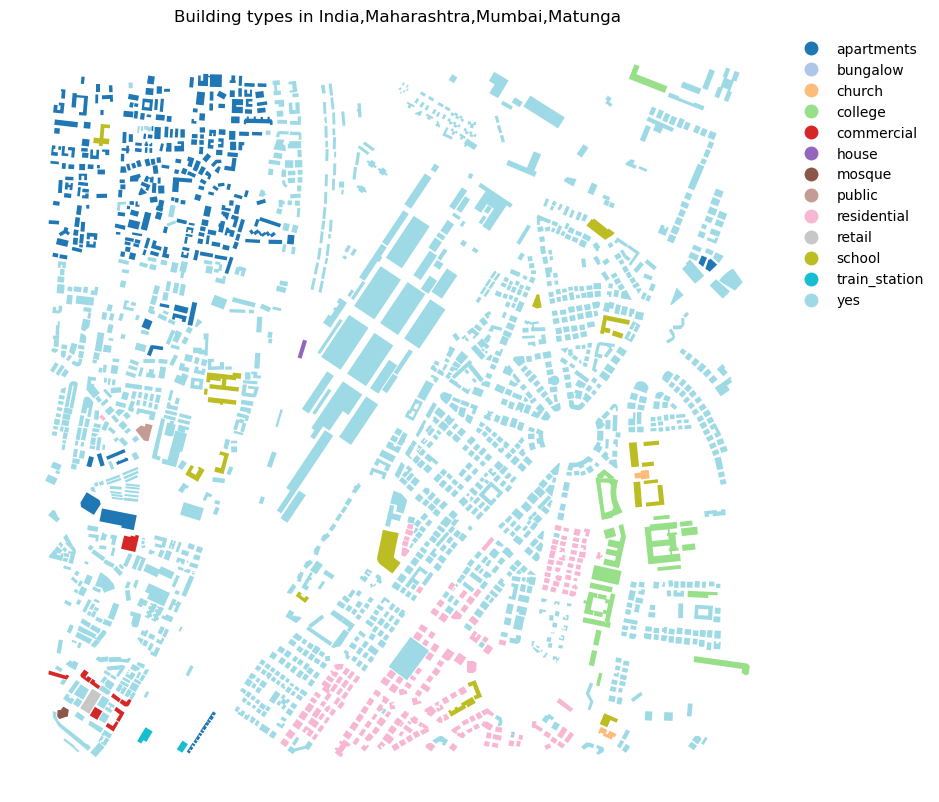

In [117]:
# create the map plot
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1),'frameon':False})

# additional attributes to the map plot

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off')

In [118]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

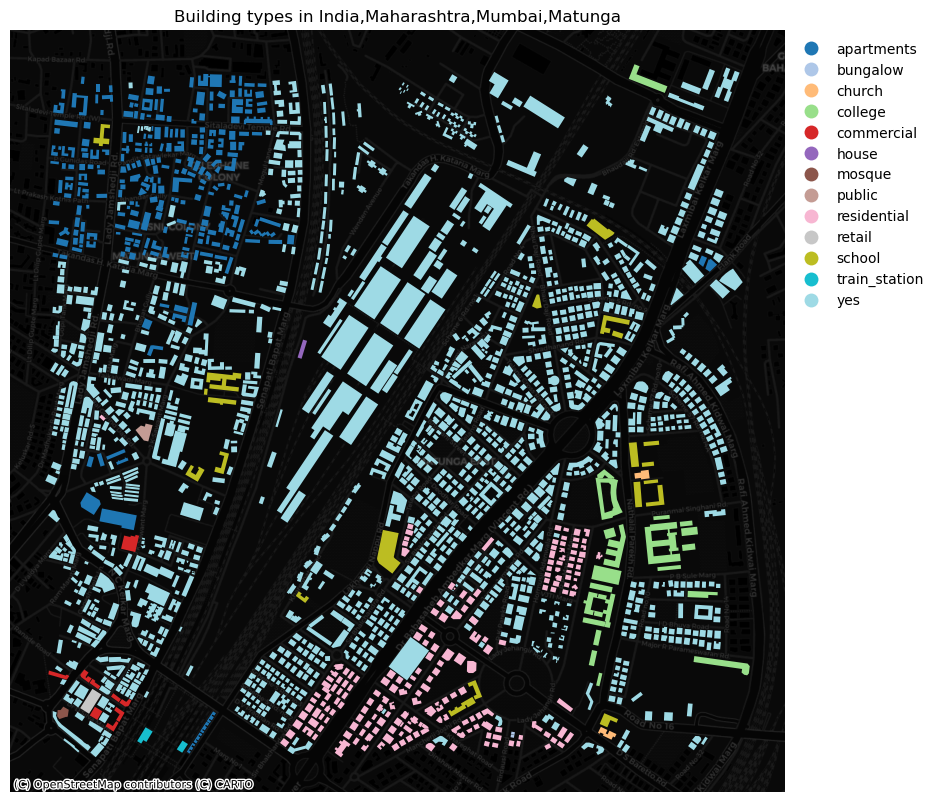

In [119]:
ax = osm_web_mercator.plot(figsize=(10,10),
                            column='building',
                            cmap='tab20',
                            legend=True,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1),'frameon':False})


# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off')

# add the basemap

# open street map basemap
# ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [120]:
# import matplotlib's colors library
import matplotlib.colors as colors

# create a list of colors based on the number of items in your legend (14), and in this case, make it all grays
color_ramp = ['gainsboro']*14

# assign a single value in the list to be red. In this case, the 3rd entry in the list is for "commercial" buildings.
color_ramp[2] = 'red'

# create your colormap 
custom_cmap = colors.ListedColormap(color_ramp)

(72.839276015, 72.86153088500001, 19.017178004999998, 19.037875495)

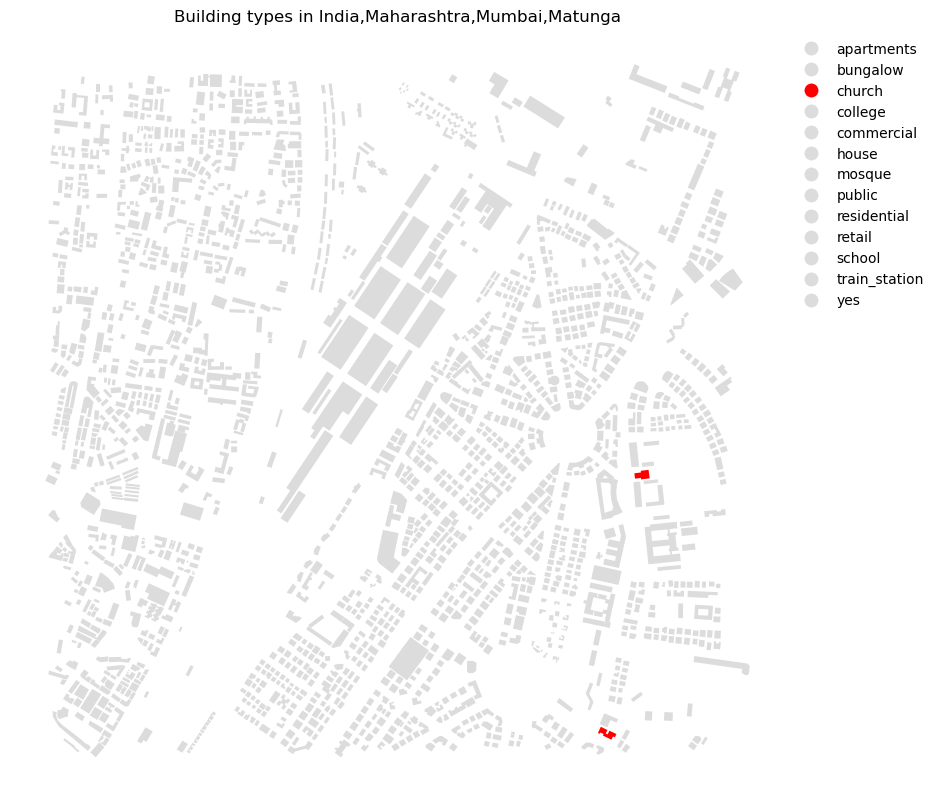

In [121]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap=custom_cmap,
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1),'frameon':False})

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off')

In [122]:
# here is the function
def make_building_map(location):
    # get the data from osm
    osm = ox.geometries_from_address(location,
                                     tags={'building':True},
                                     dist=1000)
    
    # reproject to Web Mercator
    osm_web_mercator = osm.to_crs(epsg=3857)
    
    # create the map
    ax = osm_web_mercator.plot(figsize=(10,10),
                                column='building',
                                cmap='tab20',
                                legend=True,
                                legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1),'frameon':False})
    
    # additional features

    # add a title
    ax.set_title('Building types in ' + location)

    # get rid of the axis
    ax.axis('off')
    
    # add a dark basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

CPU times: total: 781 ms
Wall time: 1.02 s


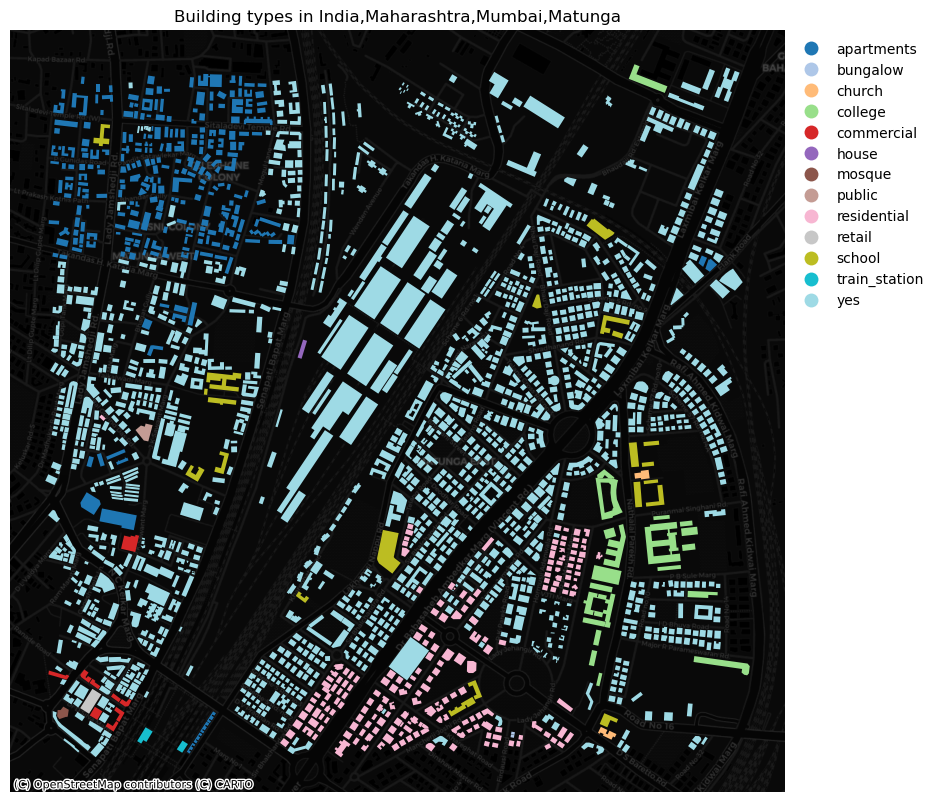

In [123]:
%%time
# run the function once
make_building_map(address)

In [124]:
address_list = [address]

CPU times: total: 703 ms
Wall time: 1.54 s


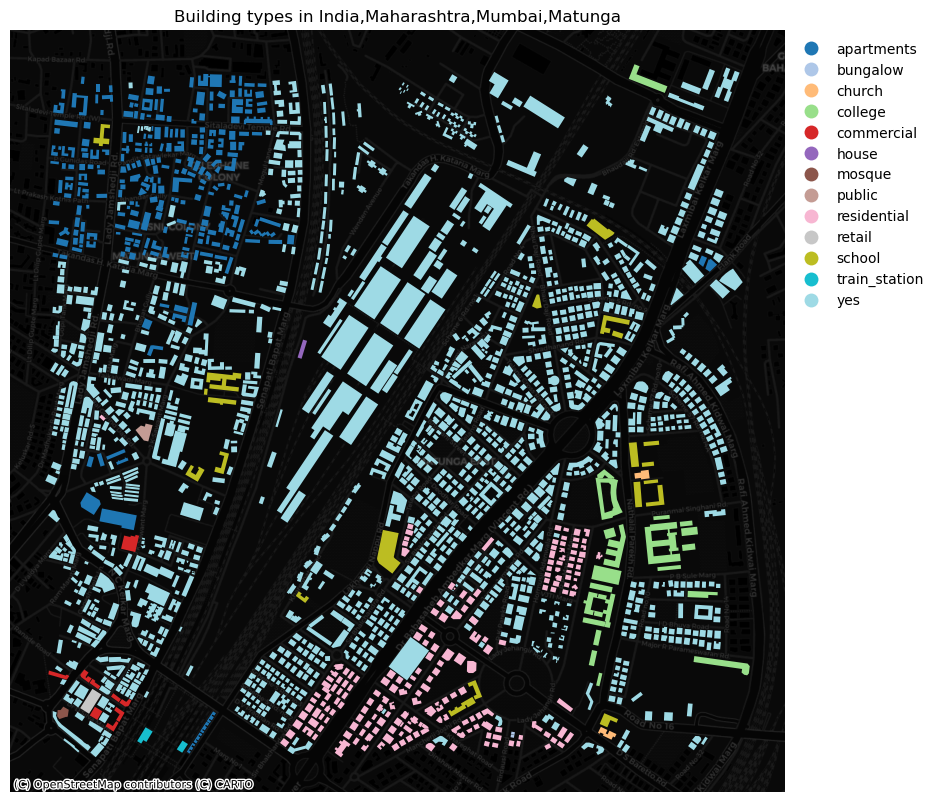

In [173]:
%%time
# run our function for every address in our list
for add in address_list:
    make_building_map(add)

In [202]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode

gis = GIS(api_key="AAPK37216d7d92424907a9af43258caf8fcbeO8Zpk6T6SOJZorTGVFfwJp52banogBQzne1C6adGvkzUxuPlBKbL3RZ9IvKOJIE")
x = address
geocode_result = geocode(address=x)

geocode_result

C:\Users\Soham Sangole\AppData\Roaming\Python\Python310\site-packages\arcgis\gis\_impl\_con\_connection.py:342: ResourceWarning: unclosed <ssl.SSLSocket fd=5424, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.29.140', 58906), raddr=('34.199.206.244', 443)>
  parsed = self._parsed(url)


[{'address': 'Matunga',
  'location': {'x': 72.85579000000007, 'y': 19.027180000000044},
  'score': 100,
  'attributes': {'Loc_name': 'World',
   'Status': 'M',
   'Score': 100,
   'Match_addr': 'Matunga',
   'LongLabel': 'Matunga, Kings Circle, Matunga East, Mumbai, Maharashtra, 400019, IND',
   'ShortLabel': 'Matunga',
   'Addr_type': 'POI',
   'Type': 'Grocery',
   'PlaceName': 'Matunga',
   'Place_addr': 'Kings Circle, Matunga East, Mumbai, Maharashtra, 400019',
   'Phone': '',
   'URL': '',
   'Rank': 19,
   'AddBldg': '',
   'AddNum': '',
   'AddNumFrom': '',
   'AddNumTo': '',
   'AddRange': '',
   'Side': '',
   'StPreDir': '',
   'StPreType': '',
   'StName': 'Kings',
   'StType': 'Circle',
   'StDir': '',
   'BldgType': '',
   'BldgName': '',
   'LevelType': '',
   'LevelName': '',
   'UnitType': '',
   'UnitName': '',
   'SubAddr': '',
   'StAddr': 'Kings Circle',
   'Block': '',
   'Sector': 'Maheshwari Udyan',
   'Nbrhd': '',
   'District': 'Matunga East',
   'City': 'Mumb

In [151]:
apiKey = 'AAPK37216d7d92424907a9af43258caf8fcbeO8Zpk6T6SOJZorTGVFfwJp52banogBQzne1C6adGvkzUxuPlBKbL3RZ9IvKOJIE'

In [194]:
gis = GIS()

webmap_search = gis.content.search(
  query='Mumbai',
  item_type="Web Map"
)
webmap_search

webmap_item = webmap_search[0]
webmap_item

<Item title:"OpenStreetMap" type:Web Map owner:esri>

In [3]:
import osmnx as ox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from shapely.geometry import Polygon

# Get the data from OSMnx
address = 'India, Maharashtra, Mumbai, Matunga'
osm = ox.geometries_from_address(address, tags={'building': True}, dist=1000)

# Subset the data and prepare features and target variable
data = osm[['geometry', 'building']]
data['area'] = data['geometry'].apply(lambda x: x.area)  # Extract area feature
data['perimeter'] = data['geometry'].apply(lambda x: x.length)  # Extract perimeter feature
data['centroid_x'] = data['geometry'].apply(lambda x: x.centroid.x)  # Extract centroid x-coordinate
data['centroid_y'] = data['geometry'].apply(lambda x: x.centroid.y)  # Extract centroid y-coordinate

# Prepare the features and target variable
X = data[['area', 'perimeter', 'centroid_x', 'centroid_y']]
y = data['building']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict building types on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  apartments       0.00      0.00      0.00        50
     college       0.00      0.00      0.00         3
 residential       0.00      0.00      0.00        41
      retail       0.00      0.00      0.00         1
      school       0.00      0.00      0.00         5
         yes       0.74      1.00      0.85       289

    accuracy                           0.74       389
   macro avg       0.12      0.17      0.14       389
weighted avg       0.55      0.74      0.63       389



C:\Users\Soham Sangole\AppData\Roaming\Python\Python310\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Soham Sangole\AppData\Roaming\Python\Python310\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Soham Sangole\AppData\Roaming\Python\Python310\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be s